# SHAP analysis for optimized gradient bousting alghorithm

In this notebook, we calculate SHAP values to explain the predictions of the optimized Gradient Boosting model and visualize feature importance.

### **Importing necessary libraries**

In [5]:
import os
import pickle
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

### **Loading the Model, Scaler and Dataset**

In [6]:
# Path to the saved model and scaler
model_path = os.path.join("Models", "Optimised Gradient boosting_v2.pkl")
scaler_path = os.path.join("Models", "Optimised Gradient boosting_scaler_v2.pkl")

# Path to the data file
data_file_path = os.path.join("CSV_files", "data_P3.csv")

# Path for saving SHAP results
shap_output_directory = "."

# Load the saved model and scaler
with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

with open(scaler_path, 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Load the dataset
data = pd.read_csv(data_file_path)

d:\Proiecte_GitHUB\DIGITERRA_ScientificReports\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Proiecte_GitHUB\DIGITERRA_ScientificReports\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Proiecte_GitHUB\DIGITERRA_ScientificReports\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estima

### **Feature Selection, Data Preparation, and Splitting**

In [7]:
# Input features
feature_names = ["Fund_Freq1", "Fund_Freq2", "PGA_of_the_recording_scale_1", 
                 "PGA_of_the_recording_scale_2", "b_Hieght", "dim_x", "dim_y",
                 "b_st", "h_st", "b_gr", "h_gr", "E", "MstY", "MstX", 
                 "Mgr", "Lshape", "bay2", "no_span_2", "no_bay_2", 
                 "no_story_2", "T1", "T2", "T3"]

# Prepare the data: apply the scaler and select only the feature columns
X = data[feature_names]
y = data["DI_cladire"]  # assuming this is the target column
X_scaled = scaler.transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### **SHAP Explainer Initialization and Global Feature Importance Visualization**

In [ ]:
# Initialize the SHAP explainer for the Gradient Boosting model
explainer = shap.Explainer(model)

# Compute SHAP values on the testing set
shap_values = explainer(X_test)

# Visualize the global feature importance (summary_plot)
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)

### **Save the SHAP values to a CSV for further analysis**

In [ ]:
shap_values_csv_path = os.path.join(shap_output_directory, "shap_values.csv")
shap_values_df = pd.DataFrame(shap_values.values, columns=feature_names)
shap_values_df.to_csv(shap_values_csv_path, index=False)
#print(f"SHAP values have been saved to: {shap_values_csv_path}")

### **Analysis and Visualization of SHAP Values for Feature Importance**

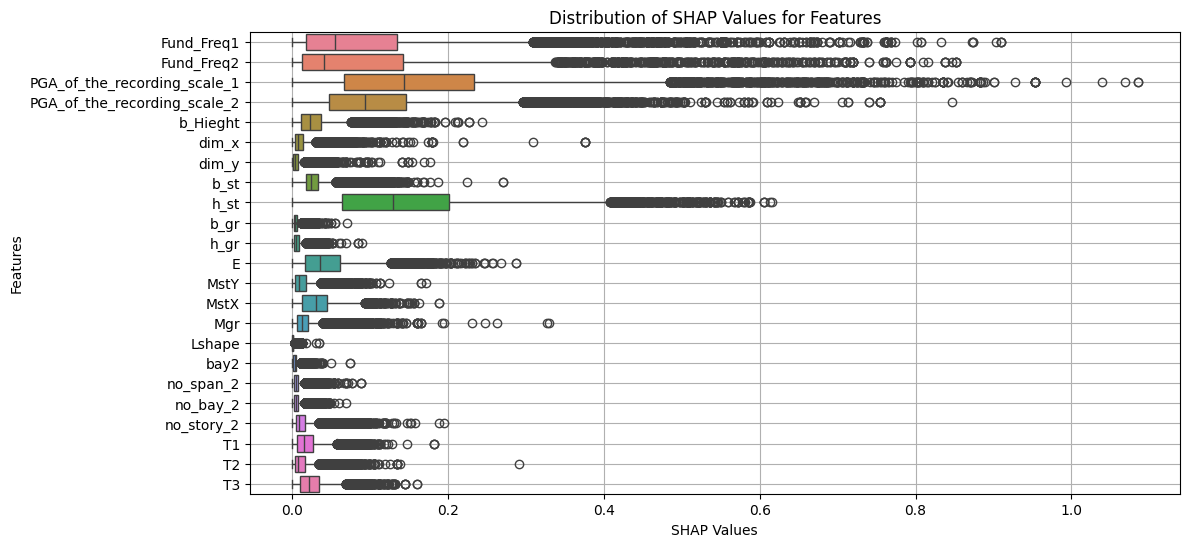

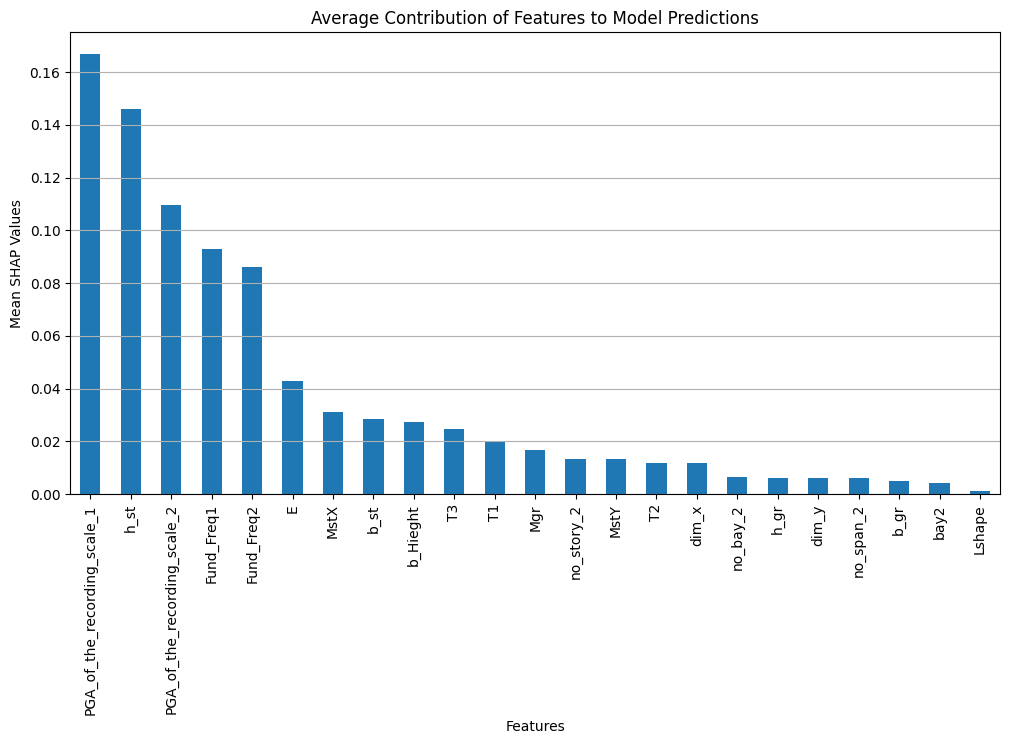

In [ ]:
# Reading the CSV file
shap_values = pd.read_csv('shap_values.csv')

# Calculating the absolute SHAP values for each feature
abs_shap_values = shap_values.abs()

# Creating a boxplot to visualize the distribution of SHAP values
plt.figure(figsize=(12, 6))
sns.boxplot(data=abs_shap_values, orient='h')
plt.title('Distribution of SHAP Values for Features')
plt.xlabel('SHAP Values')
plt.ylabel('Features')
plt.grid(True)
#plt.savefig('shap_values_distribution.pdf')  # Saving the figure
plt.show()

# Calculating the mean SHAP values and sorting them
mean_shap = abs_shap_values.mean().sort_values(ascending=False)

# Creating a bar plot with the mean SHAP values
plt.figure(figsize=(12, 6))
mean_shap.plot(kind='bar')
plt.title('Average Contribution of Features to Model Predictions')
plt.xlabel('Features')
plt.ylabel('Mean SHAP Values')
plt.grid(axis='y')
#plt.savefig('mean_feature_contribution.pdf')  # Saving the figure
plt.show()